In [223]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
countries = [
    'Australia',
    'Austria',
    'Belgium',
    'Canada',
    'Chile',
    'Colombia',
    'Costa Rica',
    'Czech Republic',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Korea',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'Switzerland',
    'Turkey',
    'USA',
    'United Kingdom'
]
countries = sorted(countries)
# countries = [
#     'Australia','Sweden', 'Costa Rica', 'Slovenia', 'Greece', 'Turkey', 'Netherlands', 'Denmark', 'Norway', 'Poland', 'Canada', 'Hungary', 'Portugal', 'Spain', 'Czech Republic', 'Belgium', 'Lithuania', 'Israel', 'New Zealand', 'Switzerland', 'Latvia', 'Chile', 'Austria', 'Finland', 'Korea', 'Colombia', 'Iceland', 'Japan', 'Luxembourg', 'USA', 'Estonia', 'Ireland', 'Italy', 'Mexico', 'United Kingdom', 'Germany'
# ]
top1p = 'p99p100'
top10p = 'p90p100'
bot50p = 'p0p50'
midp = 'mid'
percentiles = [
    top1p,
    top10p,
    bot50p
]
# https://timodenk.com/blog/exporting-matplotlib-plots-to-latex/

In [158]:
# PERCENTILE ANALYSIS FIRST
df = pd.read_csv('oecd-wealth-p-cleaned-subset.csv')

c_df = {
    country: {
        p: (country_df[country_df['P'] == p]).set_index('YEAR')
        for p, country_df in zip(percentiles,len(percentiles)*[df_i[df_i['COUNTRY'] == country]])
    }
    for country,df_i in zip(countries, len(countries)*[df])
}

for c, country_df in c_df.items():
    country_df[midp] = 1.0 - country_df[bot50p]['VALUE'] - country_df[top10p]['VALUE']

In [224]:
# Create plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2,figsize=(14,4*2), sharex=True)
# bot50%
c_cols = {}
for c in countries:
    c_cols[c] = next(ax1._get_lines.prop_cycler)['color']
    if c != "Australia":
        ax1.plot(c_df[c][bot50p]['VALUE'],alpha=0.3,linestyle='dotted', label=c,color=c_cols[c])
        # ax1.plot(c_df[c][bot50p]['VALUE'],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax1.plot(c_df[c][bot50p]['VALUE'], label=c,color=c_cols[c])
ax1.set_title("Bottom 50%")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax1.set_ylabel('Share of total (%)')
# middle percentile
for c in countries:
    if c != "Australia":
        ax2.plot(c_df[c][midp],alpha=0.3,linestyle='dotted', label=c)
        # ax2.plot(c_df[c][midp],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax2.plot(c_df[c][midp], label=c)
ax2.set_title("Top 50% to top 10%")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# top10%

for c in countries:
    if c != "Australia":
        ax3.plot(c_df[c][top10p]['VALUE'],alpha=0.3,linestyle='dotted', label=c)
        # ax3.plot(c_df[c][top10p]['VALUE'],alpha=0.3,linestyle='dashed', label=c)

    else:
        ax3.plot(c_df[c][top10p]['VALUE'], label=c)
ax3.set_title("top 10%")
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# top10%
for c in countries:
    if c != "Australia":
        ax4.plot(c_df[c][top1p]['VALUE'],alpha=0.3,linestyle='dotted', label=c)
        # ax4.plot(c_df[c][top1p]['VALUE'],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax4.plot(c_df[c][top1p]['VALUE'], label=c)

ax4.set_title("top 1%")
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax4.set_xlabel("Year")
ax2.set_xlabel("Year")
ax2.set_ylabel('Share of total (%)')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.legend(loc=(1.05,-0.3))
fig.savefig("w-fig1.pgf")

In [160]:
c_df_diff = {}
for c, country_p in c_df.items():
    c_df_diff[c] = {}
    # print(country_p)
    for p, country_df in country_p.items():
        # print(f"{p=}{country_df=}")
        if p == midp:
            c_df_diff[c][p] = country_df.pct_change().dropna()
        else:
            c_df_diff[c][p] = country_df['VALUE'].pct_change().dropna()

In [161]:
abs(c_df_diff['Australia'][midp]) 

YEAR
1996    0.000255
1997    0.000510
1998    0.000255
1999    0.002805
2000    0.001535
2001    0.003586
2002    0.002042
2003    0.000256
2004    0.001023
2005    0.001536
2006    0.005386
2007    0.004642
2008    0.003593
2009    0.002813
2010    0.000256
2011    0.001026
2012    0.007961
2013    0.005954
2014    0.000260
2015    0.004949
2016    0.004147
2017    0.008776
2018    0.003906
2019    0.001046
2020    0.003917
2021    0.012747
Name: VALUE, dtype: float64

## UPDATED pctdiff

most volatile: Chile
most volatile: Colombia
most volatile: Costa Rica
most volatile: Greece
most volatile: Ireland
most volatile: Lithuania
most volatile: Mexico


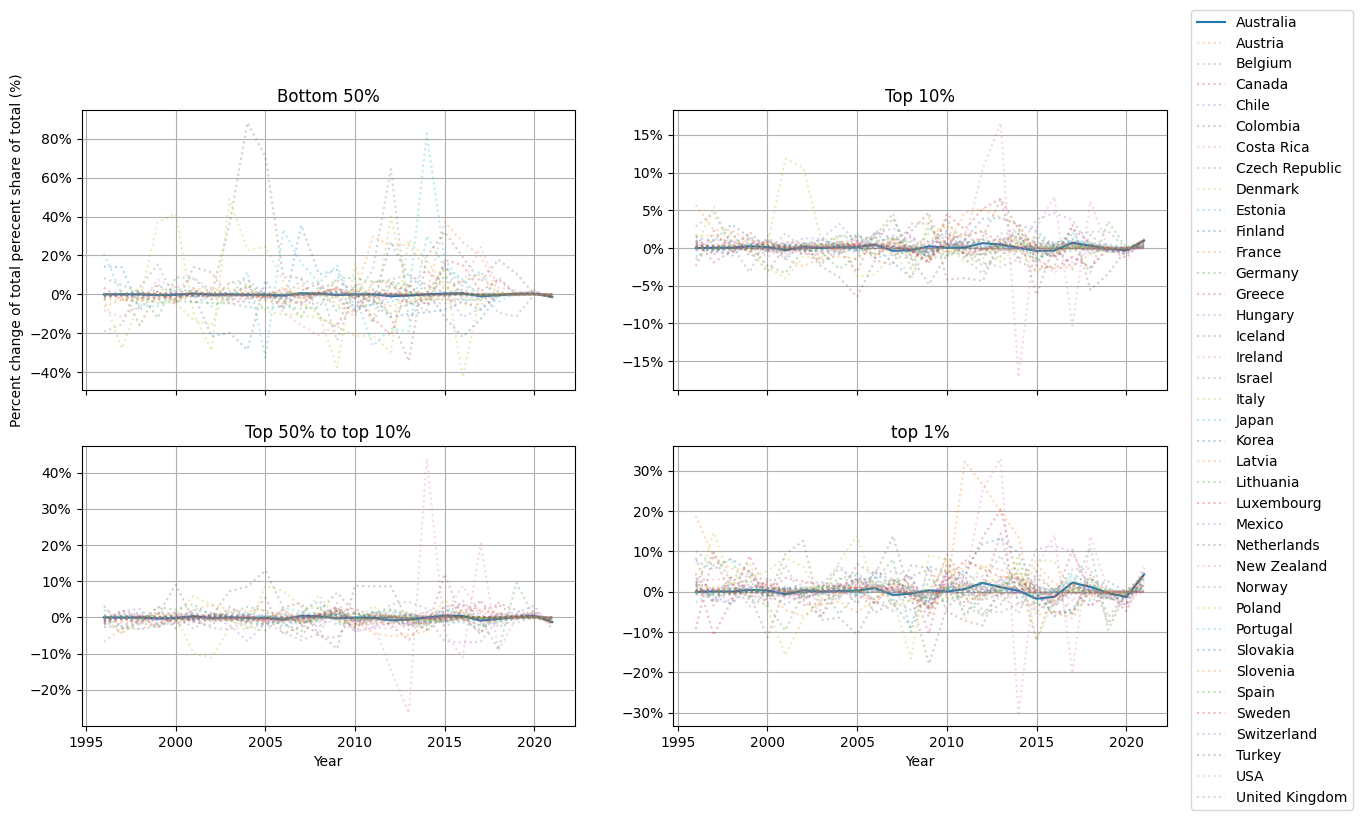

In [180]:
# Create plot
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2,figsize=(14,4*2), sharex=True)
# bot50%
for c in countries:
    tmp = abs(c_df_diff[c][bot50p])
    if max(tmp) > 1:
        print(f"most volatile: {c}")
        continue
    # if max(tmp) > .5:
    #     print(f"quite volatile: {c}")
    #     continue

    if c != "Australia":
        ax1.plot(c_df_diff[c][bot50p],alpha=0.3,linestyle='dotted', label=c,color=c_cols[c])
        # ax1.plot(c_df_diff[c][bot50p],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax1.plot(c_df_diff[c][bot50p], label=c,color=c_cols[c])
# ax1.set_ylim([-.1,.1])
ax1.set_title("Bottom 50%")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax1.set_ylabel('Percent change of total perecent share of total (%)')

# middle percentile
for c in countries:
    
    if c != "Australia":
        ax2.plot(c_df_diff[c][midp],alpha=0.3,linestyle='dotted', label=c)
        # ax2.plot(c_df_diff[c][midp],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax2.plot(c_df_diff[c][midp], label=c)
ax2.set_title("Top 50% to top 10%")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# top10%

for c in countries:
    if c != "Australia":
        
        ax3.plot(c_df_diff[c][top10p],alpha=0.3,linestyle='dotted', label=c)
        # ax3.plot(c_df_diff[c][top10p],alpha=0.3,linestyle='dashed', label=c)

    else:
        ax3.plot(c_df_diff[c][top10p], label=c)
ax3.set_title("Top 10%")
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

# top10%
for c in countries:
    if c != "Australia":
        ax4.plot(c_df_diff[c][top1p],alpha=0.3,linestyle='dotted', label=c)
        # ax4.plot(c_df_diff[c][top1p],alpha=0.3,linestyle='dashed', label=c)
    else:
        ax4.plot(c_df_diff[c][top1p], label=c)

ax4.set_title("top 1%")
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
ax4.set_xlabel("Year")
ax2.set_xlabel("Year")


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
plt.legend(loc=(1.05,-0.3))
# over 100% change
# too volatile: Costa Rica
# too volatile: Greece
# too volatile: Lithuania
# too volatile: Chile
# too volatile: Colombia
# too volatile: Ireland
# too volatile: Mexico

## Ranking of 2021 percentiles

In [172]:
bot50_2021_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][bot50p]['VALUE'].loc[2021])
    for c in countries
],key=lambda x : x[1]))]

top10_2021_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][top10p]['VALUE'].loc[2021])
    for c in countries
],key=lambda x : x[1]))]

midp_2021_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][midp].loc[2021])
    for c in countries
],key=lambda x : x[1]))]

top1_2021_rank = [ (c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][top1p]['VALUE'].loc[2021])
    for c in countries
],key=lambda x : x[1]))]


## 2021 percentile share plot

In [225]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2,figsize=(14,4*2))

# bot50%
for c, rank, p, graph_colour in bot50_2021_rank:
    if c == 'Australia':
        ax1.bar(c,p,color=graph_colour,label=c)
    else:
        ax1.bar(c,p,color=graph_colour,alpha=0.3,label=c)

# middle percentile

for c, rank, p, graph_colour in midp_2021_rank:
    if c == 'Australia':
        ax2.bar(c,p,color=graph_colour, label=c)
    else:
        ax2.bar(c,p,color=graph_colour,alpha=0.3,label=c)

# top10%


for c, rank, p, graph_colour in top10_2021_rank:
    if c == 'Australia':
        ax3.bar(c,p,color=graph_colour, label=c)
    else:
        ax3.bar(c,p,color=graph_colour,alpha=0.3, label=c)


# top1%
for c, rank, p, graph_colour in top1_2021_rank:
    if c == 'Australia':
        ax4.bar(c,p,color=graph_colour,label=c)
    else:
        ax4.bar(c,p,color=graph_colour,alpha=0.3, label=c)


all_axis = [ax1,ax2,ax3,ax4]
for ax in all_axis:
    for tick in ax.get_xticklabels():
        tick.set_rotation(80)
    ax.grid(axis='y')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

ax1.set_title("Bottom 50%")
ax1.set_ylabel('Share of total (%)')
ax2.set_ylabel('Share of total (%)')
ax2.set_title("Top 50% to top 10%")
ax3.set_title("Top 10%")
ax4.set_title("top 1%")

ax4.set_xlabel("Countries")
ax2.set_xlabel("Countries")

plt.legend(loc=(1.05,-0.3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.1,
                    hspace=0.5)
fig.savefig("w-fig0.pgf")

## Ranking Volatility

In [175]:
bot50_var_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][bot50p]['VALUE'].var())
    for c in countries
],key=lambda x : x[1]))]
midp_var_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][midp].var())
    for c in countries
],key=lambda x : x[1]))]
top10_var_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][top10p]['VALUE'].var())
    for c in countries
],key=lambda x : x[1]))]
top1_var_rank = [(c,i+1, val, c_cols[c])for i,(c, val) in enumerate(sorted([
    (c, c_df[c][top1p]['VALUE'].var())
    for c in countries
],key=lambda x : x[1]))]

## Ranking Volatility plot

In [226]:
fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2,figsize=(14,4*2))

# bot50%
for c, rank, coef, graph_colour in bot50_var_rank:
    if c == 'Australia':
        ax1.bar(c,coef,color=graph_colour,label=c)
    else:
        ax1.bar(c,coef,color=graph_colour,alpha=0.3,label=c)

# middle percentile

for c, rank, coef, graph_colour in midp_var_rank:
    if c == 'Australia':
        ax2.bar(c,coef,color=graph_colour, label=c)
    else:
        ax2.bar(c,coef,color=graph_colour,alpha=0.3,label=c)

# top10%


for c, rank, coef, graph_colour in top10_var_rank:
    if c == 'Australia':
        ax3.bar(c,coef,color=graph_colour, label=c)
    else:
        ax3.bar(c,coef,color=graph_colour,alpha=0.3, label=c)


# top1%
for c, rank, coef, graph_colour in top1_var_rank:
    if c == 'Australia':
        ax4.bar(c,coef,color=graph_colour,label=c)
    else:
        ax4.bar(c,coef,color=graph_colour,alpha=0.3, label=c)


all_axis = [ax1,ax2,ax3,ax4]
for ax in all_axis:
    for tick in ax.get_xticklabels():
        tick.set_rotation(80)
    ax.grid(axis='y')

ax1.set_title("Bottom 50%")
ax1.set_ylabel('Variance')
ax2.set_ylabel('Variance')
ax2.set_title("Top 50% to top 10%")
ax3.set_title("Top 10%")
ax4.set_title("top 1%")

ax4.set_xlabel("Countries")
ax2.set_xlabel("Countries")

plt.legend(loc=(1.05,-0.3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.1,
                    hspace=0.5)
fig.savefig("w-fig3.pgf")

In [202]:
bot50_var_rank

[('New Zealand', 1, 1.5199430199430173e-07, '#e377c2'),
 ('Canada', 2, 2.5011396011396037e-07, '#d62728'),
 ('Australia', 3, 2.645584045584044e-07, '#1f77b4'),
 ('Japan', 4, 5.777207977207981e-07, '#17becf'),
 ('Czech Republic', 5, 1.152507122507123e-06, '#7f7f7f'),
 ('Iceland', 6, 1.2834472934472942e-06, '#8c564b'),
 ('Sweden', 7, 1.3828490028490006e-06, '#d62728'),
 ('Korea', 8, 1.5875498575498571e-06, '#1f77b4'),
 ('Poland', 9, 2.7279487179487173e-06, '#bcbd22'),
 ('Belgium', 10, 6.116267806267801e-06, '#2ca02c'),
 ('Hungary', 11, 1.1080028490028491e-05, '#9467bd'),
 ('Estonia', 12, 1.181794871794872e-05, '#17becf'),
 ('Israel', 13, 1.3168148148148151e-05, '#7f7f7f'),
 ('USA', 14, 1.438230769230769e-05, '#e377c2'),
 ('Chile', 15, 1.6711794871794873e-05, '#9467bd'),
 ('Luxembourg', 16, 1.7709088319088326e-05, '#d62728'),
 ('Switzerland', 17, 2.1766353276353278e-05, '#9467bd'),
 ('France', 18, 2.857333333333334e-05, '#ff7f0e'),
 ('Germany', 19, 2.8773333333333338e-05, '#2ca02c'),
 ('U

## Linear Regressions

In [166]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression()
# vals = np.array(c_df['Australia'][top1p]['VALUE'].values).reshape(-1,1)
vals = np.array(c_df['Australia'][midp].values).reshape(-1,1)
time = np.array([i for i in range(len(c_df['Australia'][bot50p]['VALUE']))]).reshape(-1,1)
lm = lr.fit(time, vals)
# pred = lr.predict(vals)
lm.coef_

array([[-0.00041563]])

In [168]:
lr_slope_dict = {}
time = np.array([i for i in range(len(c_df['Australia'][bot50p]['VALUE']))]).reshape(-1,1)
for c, country_p in c_df.items():
    lr_slope_dict[c] = {}

    for p, country_df in country_p.items():
        lr = LinearRegression()
        if p == midp:
            vals = np.array(country_df.values).reshape(-1,1)
            lm = lr.fit(time, vals)
            lr_slope_dict[c][p] = float(lm.coef_[0])
        else:
            vals = np.array(country_df['VALUE'].values).reshape(-1,1)
            lm = lr.fit(time, vals)
            lr_slope_dict[c][p] = float(lm.coef_[0])

## Ranked by Increasing Slope

In [169]:
# format (country, ranking, coefficient, graph_co)
bot50_slope_rank = [(c,rank+1, coef, c_cols[c]) for rank,(c, coef) in enumerate(sorted([(c, country_p[bot50p]) for c,country_p in lr_slope_dict.items()], key=lambda x: x[1]))]
mid_slope_rank = [(c,rank+1, coef, c_cols[c]) for rank,(c, coef) in enumerate(sorted([(c, country_p[midp]) for c,country_p in lr_slope_dict.items()], key=lambda x: x[1]))]
top10_slope_rank = [(c,rank+1, coef, c_cols[c]) for rank,(c, coef) in enumerate(sorted([(c, country_p[top10p]) for c,country_p in lr_slope_dict.items()], key=lambda x: x[1]))]
top1_slope_rank = [(c,rank+1, coef, c_cols[c]) for rank,(c, coef) in enumerate(sorted([(c, country_p[top1p]) for c,country_p in lr_slope_dict.items()], key=lambda x: x[1]))]
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ create barplot

In [189]:
top1_slope_rank

[('Turkey', 1, -0.004462637362637364, '#8c564b'),
 ('Colombia', 2, -0.004444993894993898, '#8c564b'),
 ('Belgium', 3, -0.0012868742368742374, '#2ca02c'),
 ('Norway', 4, -0.000693528693528694, '#7f7f7f'),
 ('France', 5, -8.345543345543388e-05, '#ff7f0e'),
 ('New Zealand', 6, 0.00012106227106227075, '#e377c2'),
 ('Ireland', 7, 0.0001310134310134316, '#e377c2'),
 ('Estonia', 8, 0.00017863247863247948, '#17becf'),
 ('Denmark', 9, 0.0001956043956043957, '#bcbd22'),
 ('Iceland', 10, 0.00023302808302808314, '#8c564b'),
 ('Canada', 11, 0.0004263736263736266, '#d62728'),
 ('Spain', 12, 0.0004878510378510379, '#2ca02c'),
 ('Japan', 13, 0.000508547008547009, '#17becf'),
 ('Australia', 14, 0.0005747863247863248, '#1f77b4'),
 ('Netherlands', 15, 0.0006608669108669114, '#8c564b'),
 ('United Kingdom', 16, 0.0007742368742368744, '#7f7f7f'),
 ('Finland', 17, 0.0007828449328449331, '#1f77b4'),
 ('Lithuania', 18, 0.0007850427350427353, '#2ca02c'),
 ('Portugal', 19, 0.0007919413919413922, '#17becf'),
 ('G

## Slope Bar plots

In [227]:
from cProfile import label


fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2,2,figsize=(14,4*2))

# bot50%
for c, rank, coef, graph_colour in bot50_slope_rank:
    if c == 'Australia':
        ax1.bar(c,coef,color=graph_colour,label=c)
    else:
        ax1.bar(c,coef,color=graph_colour,alpha=0.3,label=c)

# middle percentile

for c, rank, coef, graph_colour in mid_slope_rank:
    if c == 'Australia':
        ax2.bar(c,coef,color=graph_colour, label=c)
    else:
        ax2.bar(c,coef,color=graph_colour,alpha=0.3,label=c)

# top10%


for c, rank, coef, graph_colour in top10_slope_rank:
    if c == 'Australia':
        ax3.bar(c,coef,color=graph_colour, label=c)
    else:
        ax3.bar(c,coef,color=graph_colour,alpha=0.3, label=c)


# top1%
for c, rank, coef, graph_colour in top1_slope_rank:
    if c == 'Australia':
        ax4.bar(c,coef,color=graph_colour,label=c)
    else:
        ax4.bar(c,coef,color=graph_colour,alpha=0.3, label=c)


all_axis = [ax1,ax2,ax3,ax4]
for ax in all_axis:
    for tick in ax.get_xticklabels():
        tick.set_rotation(80)
    ax.grid(axis='y')

ax1.set_title("Bottom 50%")
ax1.set_ylabel('Linear Trend Coefficient')
ax2.set_ylabel('Linear Trend Coefficient')
ax2.set_title("Top 50% to top 10%")
ax3.set_title("Top 10%")
ax4.set_title("top 1%")

ax4.set_xlabel("Countries")
ax2.set_xlabel("Countries")

plt.legend(loc=(1.05,-0.3))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.1,
                    hspace=0.5)
fig.savefig("w-fig2.pgf")

In [221]:
top1_slope_rank

[('Turkey', 1, -0.004462637362637364, '#8c564b'),
 ('Colombia', 2, -0.004444993894993898, '#8c564b'),
 ('Belgium', 3, -0.0012868742368742374, '#2ca02c'),
 ('Norway', 4, -0.000693528693528694, '#7f7f7f'),
 ('France', 5, -8.345543345543388e-05, '#ff7f0e'),
 ('New Zealand', 6, 0.00012106227106227075, '#e377c2'),
 ('Ireland', 7, 0.0001310134310134316, '#e377c2'),
 ('Estonia', 8, 0.00017863247863247948, '#17becf'),
 ('Denmark', 9, 0.0001956043956043957, '#bcbd22'),
 ('Iceland', 10, 0.00023302808302808314, '#8c564b'),
 ('Canada', 11, 0.0004263736263736266, '#d62728'),
 ('Spain', 12, 0.0004878510378510379, '#2ca02c'),
 ('Japan', 13, 0.000508547008547009, '#17becf'),
 ('Australia', 14, 0.0005747863247863248, '#1f77b4'),
 ('Netherlands', 15, 0.0006608669108669114, '#8c564b'),
 ('United Kingdom', 16, 0.0007742368742368744, '#7f7f7f'),
 ('Finland', 17, 0.0007828449328449331, '#1f77b4'),
 ('Lithuania', 18, 0.0007850427350427353, '#2ca02c'),
 ('Portugal', 19, 0.0007919413919413922, '#17becf'),
 ('G